In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3

# An Accurate Replacement Fertiltiy Rate for Bulgaria (And Why It Matters)

### Abstract
In the realm of demographics, the replacement fertiltiy level is described as the amount of children each woman would need to have so as to maintain a stable population. The general interpretation is that, ignoring migration, a state must have a total fertility rate of 2.1 children per woman. While this is helpful in certain cases, it might help to be a little more accurate than this when looking at specific countries, as each nation deals with its own unique circumstances. In this article we will be looking at whether Bulgaria's replacement fertility level should be slightly different, based on recent population trends and research in other countries.

### Introduction
In order to get a thorough enough understanding of what we are dealing with, we will be going over some key concepts and analyze current and recent trends in the Bulgarian population. This will allow us to draw better conclusions about the underlying issues at the end.

Here is a list of all the key terms we will be using throughout this article:
* net migration
* growth rate
* mortality rate
* total fertility rate
* (mean) age of childbearing

Let's take a look at each term individually and create a function for those we might need.

#### Net Migration
Net migration refers to the "net total of migrants" throughout the year. In other words, if we take the number of immigrants ($I$) and subtract the number of emigrants ($E$), we will end up with the net migration ($NM$).

$$ NM = I - E $$

In [369]:
def calculate_net_migration(i, e):
    result = i - e
    return result

#### Growth Rate
A country's growth rate ($GR$) is a percentage that shows the change in its population from the previous year ($P_{p}$). The change itself is depentdent on three variables - number of births ($B$), number of deaths ($D$), and net migration ($NM$). 

$$ GR = \frac{(P_{p} + B - D + NM)}{P_{p}} - 1 $$

In [370]:
def calculate_growth_rate(pp, b, d, nm):
    result = ((pp + b - d + nm) / pp) - 1
    return result

#### Mortality Rate
The mortality rate ($MR$) is a probability of someone in a specific population dying. Rather than being looked at simply as the number of deaths ($D$) divided by the still living population ($P$) plus the death count, it is typically expressed as the number of deaths observed per every 1000 people in that period.

$$ MR = \frac{D}{P + D} \cdot 1000 $$

In [371]:
def calculate_mr(d, p):
    result = (d * 1000) / p
    return result

#### Total Fertility Rate
The total fertility rate in a given year is the "total number of children that would be born to each woman", assuming that she would survive all her fertile years and her births would be "in alignment with the prevailing age-specific fertility rates". Typically, age-specific fertility rates are gathered across different age groups of five year intervals (20-24-year-olds, 25-29-year-olds, etc.). The fertility rate that would ensure a stable population (ignoring migration) is called the replacement fertility level.

#### Mean Age of Childbearing
Also known as mean age of mothers at childbirth ($\bar{A_{m}}$), this is calculated by taking the sum of all mothers' ages at the point of their giving birth ($\sum A_{m}$) across all births for that year($B$), no matter whether it is her first born or not.

$$ \bar{A_{m}} = \frac{\sum A_{m}}{B} $$

In [372]:
def calculate_mac(sum_mothers_ages, b):
    result = sum_mothers_ages / b
    return result

### Population (1950-2023)
Now that we have some understanding of the terms, let's see them in practice by looking at data collected by the United Nations from 1950-2023. First of all we have data for population, births, deaths, net migration, and fertility rates. In order to make some better comparisons, we will plot the births and deaths on the same graph.

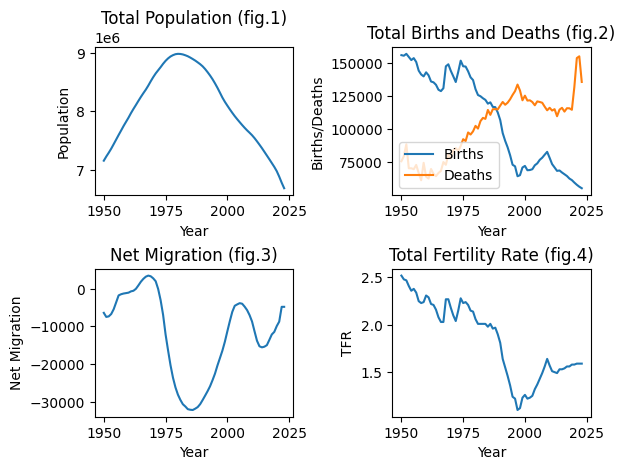

In [373]:
demographics_table = pd.read_csv('sql-database/demographics-table.csv')

f, ax = plt.subplots(2, 2)
ax[0, 0].plot(demographics_table['YearId'].values, demographics_table['Population'].values)
ax[0, 0].set_title('Total Population (fig.1)') 
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Population')

ax[0, 1].plot(demographics_table['YearId'].values, demographics_table['Births'].values)
ax[0, 1].plot(demographics_table['YearId'].values, demographics_table['Deaths'].values)
ax[0, 1].set_title('Total Births and Deaths (fig.2)') 
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('Births/Deaths')
ax[0, 1].legend(['Births', 'Deaths'], loc='lower left') 

ax[1, 0].plot(demographics_table['YearId'].values, demographics_table['Net Migration'].values)
ax[1, 0].set_title('Net Migration (fig.3)') 
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('Net Migration')

ax[1, 1].plot(demographics_table['YearId'].values, demographics_table['Total Fertility Rate'].values)
ax[1, 1].set_title('Total Fertility Rate (fig.4)') 
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('TFR')

f.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

According to the first graph (fig.1), the population of Bulgaria peaked in 1980 and has been decreasing ever since. From this we can conclude that the growth rate of the population has been negative since that year. Net migration (fig.3) appears to be a major factor in this change, as we can see a big shift from more immigrants to more emigrants just after 1970. Historically, especially towards the end of the 1980's, many of these emigrants would likely have been the Bulgarian Turks, who were subjected to the assimilation process by the communist regime of the time. All the while, the births (fig.2) continued to be more than the deaths until 1989. The fertility rates (fig.4) seem to stay relatively close to the replacement level between 1960 and 1989, but clearly experience a slow general decline.

After the fall of the communist party in 1989, we can see a steep decline in the number of births and hence the fertility rates, while emigration, continued to be rife until the end of the century. This is directly linked with the opening of the borders and economic turmoil the country experienced throughout the decade. In 1997, the number of deaths experienced it's first peak, while the total fertility rate fell to an all-time low of 1.10 children per woman.

At the turn of the century, births began increasing slightly and net migration reached a thrity year high in 2005. However, one significant event came around 2007, when emigration once again began increasing and roughly tripling the still negative net migration within a span of five years. This coincides with Bulgaria joining the European Union. Shortly after that came the 2008-09 financial crisis, which negatively affected the fertility rates of many states' worldwide. We can see in our case that after years of increasing to a local maximum of 1.64 children per woman in 2009, the fertility rates experienced a drop and have still not fully recovered. The last big change we can note is the sudden spike in deaths at the beginning of the current decade. While this would naturally affect the population, it appears that the number of births were unaffected and have continued declining at a fairly constant rate over the last ten years.

At the same time, there are other broader factors at play. Falling fertility rates across almost all European countries has been observed ever since the 1960's. While the more developed nations have often managed to maintain their population thanks to immigraiton, Bulgaria's negative net migration does not allow for any compensation in that regard, even though net migration has been on the rise in recent years. 

### Replacement fertility level - Method of calculation
#### An Accurate Replacement Rate
While 2.1 children per woman is used in a lot of cases for all countries' replacement rate, this is something of a generalization. Research shows that such a rate is currently only applicable for the more developed countries. For instance, in 2001, the office of population research at Princeton university stated in an article that some nations had a replacement rate as high as 3.4. Sometimes, the accurate number could be even a little lower. In 2003, according to an article by the Office for National Statistics in the UK, it was determined that England and Wales had a replacement rate of 2.07 two years previously. Let's take a closer look at how this is calculated.

#### Key factors
There are two key factors to consider when determining a country's replacement fertility level - mortality before childbearing and birth sex ratios. The death rates are important becuase not all women end up living the entirety of their fertile years, meaning that some percentage will inevitably end up not having a single child. Sex ratios matter since a higher proportion of males being born would mean that women would need to have more children on average so as to maintain the population. Generally, the sex ratios for most countries is about 1.05 males to every 1 female.

#### Formula
To reach such a figure, we will use the following calculation method, used by Princeton University:
$$ TFRr = \frac{(1 + SRB)}{\mathcal{P}(\bar{A_{m}})} $$

In [374]:
def calculate_replacement_level(srb, prob):
    result = (1 + srb) / prob
    return result

Here, we take the sex ratio at birth ($SRB$) and add one to it (the ratio must be males to females). Afterwards, the sum is divided by the probability of a woman reaching the mean age of childbearing ($\mathcal{P}(\bar{A_{m}})$).

Now we know how to reach the number we need, let's put it into practice.

### Calculating the Replacement Fertility Rate
#### TFRr for 2023
First of all, we need to fetch the data for the replacement fertility formula. The birth sex ratio can be calculated from the National Statistics Institute (NSI). We have the counry's mean age of childbearing from the UN data.

In [375]:
boys_and_girls_births_table = pd.read_csv('sql-database/boys-and-girls-births-table.csv')
np_births_data = boys_and_girls_births_table.to_numpy()

def determine_srb(row, np_births_data):
    boys = np_births_data[row][3]
    girls = np_births_data[row][4]
    ratio = boys / girls
    return ratio
    
row = 13
srb = determine_srb(row, np_births_data)
srb

1.0516159116180637

In [376]:
mean_age_childbearing_2023 = demographics_table['Mean Age of Childbearing'][73]
mean_age_childbearing_2023

27.95

This is where we run into a problem. There is no data to give us a precise mortality rate for women before that specific age. The NSI does however collect data for deaths by both sex and age groups (split by five year intervals), as well as the total number of women currently living in Bulgaria by the same age groups. While this may not be entirely accurate, we will assume that it is accurate enough for a better estimation of the country's replacement fertility level.

We will apply the mortality rate formula to the female population under the age of 30 (or up until the 25-29 age group).

In [377]:
female_population_table = pd.read_csv('sql-database/female-population-by-age-groups-table.csv')
female_deaths_table = pd.read_csv('sql-database/female-deaths-by-age-groups-table.csv')
np_female_population_data = female_population_table.to_numpy()
np_female_deaths_data = female_deaths_table.to_numpy()

In [378]:
def determine_female_mr(row, np_female_population_data, np_female_deaths_data):
    population_sample = 0
    deaths_sample = 0

    for i in range(3, 10):
        population_sample += np_female_population_data[row][i]
        deaths_sample += np_female_deaths_data[row][i]

    female_mr = calculate_mr(deaths_sample, population_sample)
    return female_mr

In [379]:
row = 13
female_mr = determine_female_mr(row, np_female_population_data, np_female_deaths_data)
female_mr

0.38392079400851586

Once we convert the mortality rate into a percentage and subtract it from 1, we will be ready to apply the replacement level calculation.

In [380]:
def determine_replacement_level(female_mr, srb):
    female_mr_percentage = female_mr / 1000
    probability_survival = 1 - female_mr_percentage

    replacement_level = calculate_replacement_level(srb, probability_survival)
    return replacement_level

In [381]:
replacement_level_2023 = determine_replacement_level(female_mr, srb)
replacement_level_2023

2.052403872142283

As we can see, the replacement fertility rate for 2023 is somewhat lower than the generally accepted number and stands at roughly 2.05 children per woman.

#### TFRr since 2010
Given that the NSI presents all essential data on the topic as far back as 2010, let's see how much the replacement level has varied in the last fourteen years. As the mean age of childbearing varies only from 27 to 28 years old within the last 14 years, we will continue to use the same age groups.

In [382]:
replacement_level_array = []
current_year = 2010

for n in range(0, 14):
    female_mr = determine_female_mr(n, np_female_population_data, np_female_deaths_data)
    srb = determine_srb(n, np_births_data)
    replacement_level = determine_replacement_level(female_mr, srb)
    replacement_level_array.append([str(current_year), srb, female_mr, replacement_level])
    current_year += 1

replacement_level_df = pd.DataFrame(replacement_level_array).T
replacement_level_df.rename({0: 'Year', 1: 'Sex Ratio at Birth', 2: 'Female MR (<30)', 3: 'TFRr'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Sex Ratio at Birth,1.058865,1.064699,1.065842,1.046413,1.057382,1.068003,1.05587,1.051944,1.069577,1.049695,1.057742,1.05132,1.04517,1.051616
Female MR (<30),0.277368,0.550756,0.473798,0.475708,0.509029,0.472641,0.428399,0.427238,0.444455,0.43066,0.386912,0.499191,0.424952,0.383921
TFRr,2.059436,2.065836,2.066821,2.047387,2.05843,2.068981,2.056751,2.052821,2.070497,2.050578,2.058538,2.052344,2.04604,2.052404


### Analysis
From these calculations, we notice that the replacement rate does not vary too much from year to year. We can take a look at how the accurate replacement rates compare with the actual fertility rates for the past fourteen years.

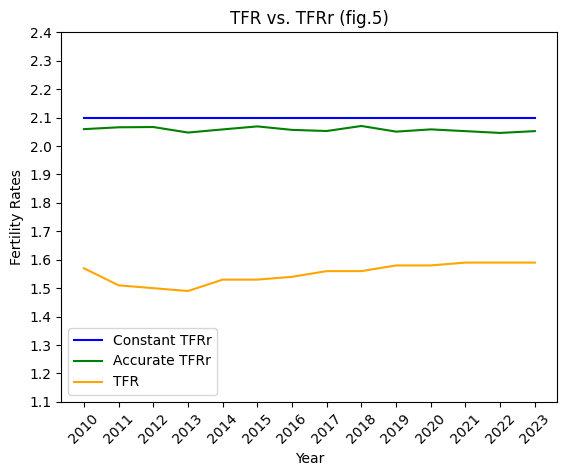

In [383]:
replacement_level_np = replacement_level_df.to_numpy()
plt.plot(replacement_level_np[0], [2.1 for _ in range(len(replacement_level_np[3]))], color='blue')
plt.plot(replacement_level_np[0], replacement_level_np[3], color='green')
plt.plot(replacement_level_np[0], demographics_table['Total Fertility Rate'].values[60:74], color='orange')
plt.xlabel('Year')
plt.ylabel('Fertility Rates')
plt.xticks(rotation=45)
plt.yticks(np.arange(1.1, 2.5, 0.1))
plt.title('TFR vs. TFRr (fig.5)')
plt.legend(['Constant TFRr', 'Accurate TFRr', 'TFR'], loc='lower left') 
plt.show()

Clearly, the difference between these numbers and generally accepted rate of 2.1 will not make the country's recent total fertility rates substantially more positive. In addition to that, since the sex ratios at birth are always higher than one and the mortality rate in question is significantly close to zero, there is little reason to suggest that the replacement level will fall much further. When compared with the UN data of deaths, one thing to notice is how despite the number of deaths spike significantly between 2020 and 2022, yet the replacement level decreased slightly within that period. We cannot say that the coronavirus pandemic did not affect the data during that time however, as the mortality rate for females under thirty experienced a peak in 2021. 

Nevertheless, this information can be viewed in a more historical context. Although the NSI does not present data before 2010 on the topic, the UN provides data on infant mortality rates (newborns under a year old) since 1950. Looking at these results may be insightful as to what we can assume the replacement level to have looked like.

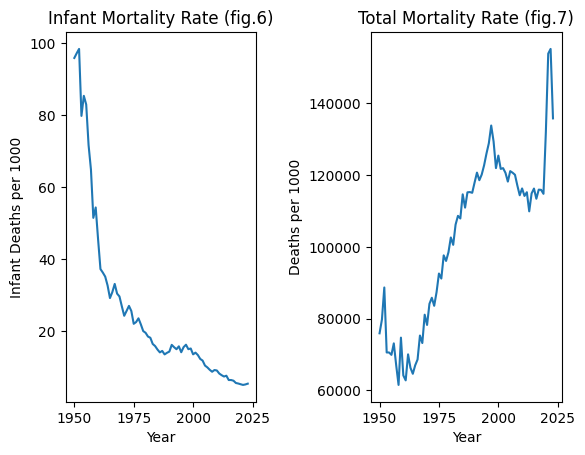

In [384]:
f, ax = plt.subplots(1, 2)
ax[0].plot(demographics_table['YearId'].values, demographics_table['Infant Mortality Rate'].values)
ax[0].set_title('Infant Mortality Rate (fig.6)') 
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Infant Deaths per 1000')

ax[1].plot(demographics_table['YearId'].values, demographics_table['Deaths'].values)
ax[1].set_title('Total Mortality Rate (fig.7)') 
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Deaths per 1000')

f.subplots_adjust(wspace=0.6, hspace=0.5)
plt.show()

This could open up the possibility that Bulgaria's true replacement fertility rate was above 2.1 not too long ago. It is indicative therefore of the country's overall progress that it has reached such a low replacement level. Nevertheless, we should mention that male mortality rates, at least for younger age groups, are usually higher than those for females, meaning that we shouldn't consider the overall mortality rates as sufficient evidence.

### Conclusions and Possible Future Research
Bulgaria appears to have a replacement fertility rate slightly below 2.1 children per woman. This could signify the improvements made by the country in regard to low mortality for the younger population, although further data is required to be sure of this. Despite that, this does not change the fact that total fertility rates are still much lower than required to sustain the population.

It should be noted once again, that the overall population decline is not only due to the fertility rates being below replacement level. Negative net migration is also an essential component to the growth rates. Further research on this topic could involve finding a way to assimilate that factor in with the fertility rates to determine an even more accurate replcement level. _____ uses such a method to multiple countries in his paper on "____", though usually focusing on countries with more immigrants than emigrants. Applying this knowledge to Bulgaria may give us more insight into what an adequate replacement rate could look like. The more accurate we can get at determining the true replacement fertility rate, the better we will understand how far away we are from maintaining a stable population.

### Margins of Error
* Due to lack of sufficient data, we included female mortality rates up to the age group within which the mean age of childbearing was situated
* Data from the United Nations and the National Statistics Institute in Bulgaria is not identical, meaning that the combination of data from the two sources could make findings less accurate
* The infant mortality rates do not isolate male and female newborns, making them an unreliable factor in drawing certain conclusions

### Bibliography